In [64]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from urlextract import URLExtract
import pandas as pd
import seaborn as sns
from collections import Counter
extract = URLExtract()
import emoji
from textblob import TextBlob

In [65]:

# Function to convert time format to 24-hour format
def convert_to_24_hours(time_str):
    # Replace the narrow no-break space with a regular space
    time_str = time_str.replace('\u202f', ' ')
    # Parse the time string to a datetime object
    time_obj = pd.to_datetime(time_str, format='%d/%m/%y, %I:%M %p')
    # Convert the datetime object to a string in 24-hour format
    time_24_hours = time_obj.strftime('%d/%m/%y, %H:%M')
    return time_24_hours

# Read the WhatsApp chat data from the text file
with open('grp chat_modified.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Process each line and convert the time format
modified_lines = []
for line in chat_data:
    # Extract the time from each line using a regular expression
    match = re.search(r'\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2} [ap]m', line)
    if match:
        time_str = match.group()
        time_24_hours = convert_to_24_hours(time_str)
        line = line.replace(time_str, time_24_hours)

    # Append the modified line to the list
    modified_lines.append(line.strip())

# Write the modified chat data back to the file
with open('grp chat_modified.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(modified_lines))

# Read the modified chat data from the file
with open('grp chat_modified.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract dates and messages
pattern = r'(\d{2}/\d{2}/\d{2}, \d{2}:\d{2}) - (.*)'
chat_tuples = [re.match(pattern, line).groups() for line in chat_data if re.match(pattern, line)]

# Create DataFrame
df = pd.DataFrame(chat_tuples, columns=['message_date', 'user_message'])

# Convert the message_date column to datetime format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M')

# Rename the message_date column to date
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the DataFrame
df=pd.DataFrame(df)
df

,date,user_message
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya"""
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>
3,2023-06-03 10:53:00,Jalla Srikanth added you
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...
...,...,...
13747,2024-03-03 15:47:00,Lenze: <Media omitted>
13748,2024-03-03 15:50:00,Lenze: <Media omitted>
13749,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>
13750,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>


In [66]:
df.shape

(13752, 2)

In [67]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
# df.drop(columns=['user_message'], inplace=True)
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [38]:
df

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...,group_notification,Messages and calls are end-to-end encrypted. N...,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya""",group_notification,"Jalla Srikanth created group ""Aadhya""",2023-06-03,2023,6,June,3,Saturday,10,53,10-11
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
3,2023-06-03 10:53:00,Jalla Srikanth added you,group_notification,Jalla Srikanth added you,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...,Jalla Srikanth,Mana vit students ni kuda add cheskunna🥲,2023-06-03,2023,6,June,3,Saturday,10,54,10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13747,2024-03-03 15:47:00,Lenze: <Media omitted>,Lenze,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,15,47,15-16
13748,2024-03-03 15:50:00,Lenze: <Media omitted>,Lenze,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,15,50,15-16
13749,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,16,31,16-17
13750,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,16,31,16-17


In [68]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [69]:
df.head()

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...,group_notification,Messages and calls are end-to-end encrypted. N...,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya""",group_notification,"Jalla Srikanth created group ""Aadhya""",2023-06-03,2023,6,June,3,Saturday,10,53,10-11
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
3,2023-06-03 10:53:00,Jalla Srikanth added you,group_notification,Jalla Srikanth added you,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...,Jalla Srikanth,Mana vit students ni kuda add cheskunna🥲,2023-06-03,2023,6,June,3,Saturday,10,54,10-11


In [70]:
print(df.columns)

Index(['date', 'user_message', 'user', 'message', 'only_date', 'year',
       'month_num', 'month', 'day', 'day_name', 'hour', 'minute', 'period'],
      dtype='object')


In [71]:
words=[]
for message in df['message']:
    words.extend(message.split())
total_number_of_words=len(words)
total_number_of_words

49162

In [72]:
num_media_messages = df[df['message'] == '<Media omitted>'].shape[0]
num_media_messages

1439

In [73]:
links = []
for message in df['message']:
    links.extend(extract.find_urls(message))
no_of_links_shared=len(links)
no_of_links_shared

374

In [76]:
#most active user 
most_active_5 = df['user'].value_counts().head(6)
names_wise_percentage = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})

names_wise_percentage
most_active_5

user
Jalla Srikanth    3391
Somnath Reddy     3358
Snake(🐍)          3065
Deepu Vit Ecm     2228
Venkat Vit        1199
Lenze              492
Name: count, dtype: int64

C:\Users\somna\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


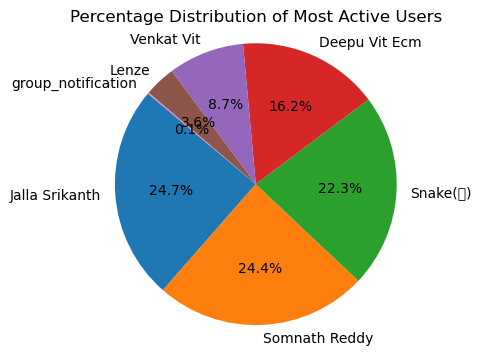

In [77]:

import matplotlib.pyplot as plt

# Filter the DataFrame to get the most active users
most_active_5 = df['user'].value_counts().head(6)

# Calculate the percentage distribution of users
names_wise_percentage = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index()
names_wise_percentage.columns = ['name', 'percent']

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(names_wise_percentage['percent'], labels=names_wise_percentage['name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Most Active Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [78]:
# Open and read the stop words file
with open('stop_hinglish.txt', 'r') as f:
    stop_words = f.read()

# Filter the DataFrame based on selected user
#Enter user name for word cloud
selected_user = 'Overall'  # Replace 'Somnath Reddy' with the desired user name
if selected_user != 'Overall':
    df_selected_user = df[df['user'] == selected_user]
else:
    df_selected_user = df

# Remove rows with 'group_notification' user and '<Media omitted>' message
temp = df[(df['user'] != 'group_notification') & (df['message'] != '<Media omitted>')]

# Remove stop words from messages
cleaned_messages = []
for message in temp['message']:
    cleaned_message = ' '.join([word for word in message.lower().split() if word not in stop_words and word not in "https"])
    cleaned_messages.append(cleaned_message)


len(cleaned_messages)

12294

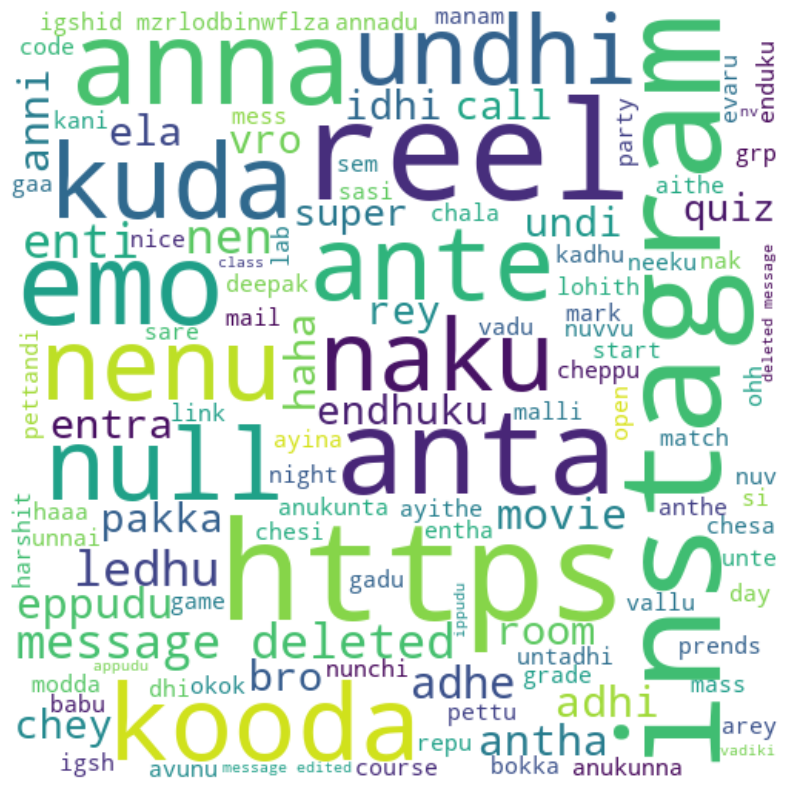

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned messages into a single string
text = ' '.join(cleaned_messages)

# Create a WordCloud object
wordcloud = WordCloud(width=500,height=500,min_font_size=10,background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [84]:

# Open and read the stop words file
with open('stop_hinglish.txt', 'r') as f:
    stop_words = f.read()

# Filter the DataFrame based on selected user
selected_user = 'Somnath Reddy'  # Replace 'Somnath Reddy' with the desired user name
if selected_user != 'Overall':
    df_selected_user = df[df['user'] == selected_user]
else:
    df_selected_user = df

# Remove rows with 'group_notification' user and '<Media omitted>' message
temp = df_selected_user[(df_selected_user['user'] != 'group_notification') & (df_selected_user['message'] != '<Media omitted>')]

# Remove stop words from messages and count the occurrences of each word
words = []
for message in temp['message']:
    words.extend([word.lower() for word in message.split() if word.lower() not in stop_words])

# Create a DataFrame with the top 20 most common words
most_common_words_df = pd.DataFrame(Counter(words).most_common(50), columns=['Word', 'Frequency'])
# Print or return the DataFrame with the most common words
most_common_words_df


,Word,Frequency
0,😂,138
1,kooda,104
2,nen,79
3,anna,66
4,😂😂,59
5,ante,56
6,emo,51
7,anta,51
8,modda,48
9,vro,47


In [85]:
selected_user='Deepu Vit Ecm'
if selected_user != 'Overall':
    df= df[df['user'] == selected_user]

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,🙂,85
1,😂,64
2,🥲,63
3,🔥,55
4,😢,17
5,🙄,13
6,🌚,12
7,🌝,6
8,💯,5
9,🕳,5


In [86]:
selected_user='Overall'
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2023,6,June,41,June-2023
1,2023,7,July,354,July-2023
2,2023,8,August,425,August-2023
3,2023,9,September,240,September-2023
4,2023,10,October,370,October-2023
5,2023,11,November,347,November-2023
6,2023,12,December,144,December-2023
7,2024,1,January,97,January-2024
8,2024,2,February,206,February-2024
9,2024,3,March,4,March-2024


In [87]:
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]
df['day_name'].value_counts()

day_name
Monday       418
Friday       384
Saturday     369
Sunday       325
Thursday     285
Wednesday    265
Tuesday      182
Name: count, dtype: int64

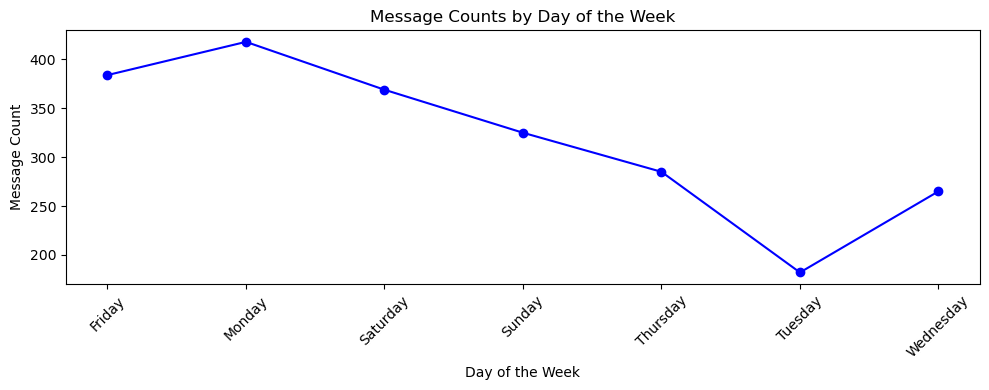

In [88]:
# Filter the DataFrame if a specific user is selected
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

# Count the number of messages for each day of the week
day_counts = df['day_name'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(10, 4))
plt.plot(day_counts.index, day_counts.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Message Count')
plt.title('Message Counts by Day of the Week')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


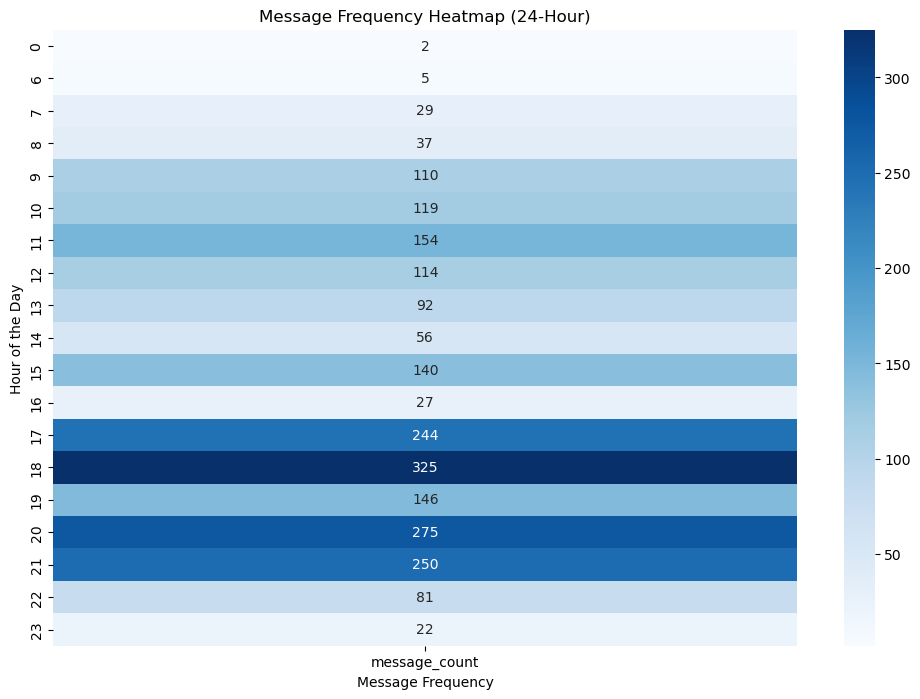

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by hour and count the number of messages
hourly_message_count = df.groupby('hour').size().reset_index(name='message_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_message_count.set_index('hour'), cmap='Blues', annot=True, fmt='d')
plt.title('Message Frequency Heatmap (24-Hour)')
plt.xlabel('Message Frequency')
plt.ylabel('Hour of the Day')
plt.show()


In [90]:
#monthly activity
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]
df['month'].value_counts()



month
August       425
October      370
July         354
November     347
September    240
February     206
December     144
January       97
June          41
March          4
Name: count, dtype: int64

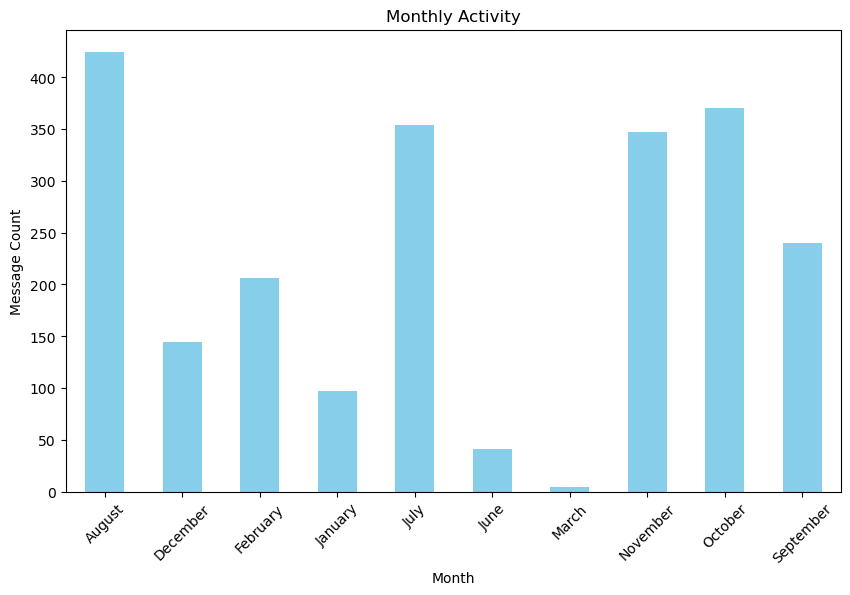

In [91]:
import matplotlib.pyplot as plt

# Aggregate data by month and count the number of messages
monthly_activity = df['month'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_activity.plot(kind='bar', color='skyblue')
plt.title('Monthly Activity')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()


In [92]:
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
user_heatmap

period,00-1,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-00,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,
Friday,0.0,34.0,24.0,39.0,13.0,12.0,1.0,0.0,30.0,98.0,21.0,44.0,48.0,1.0,0.0,0.0,6.0,7.0,6.0
Monday,1.0,4.0,18.0,25.0,32.0,7.0,68.0,11.0,90.0,98.0,10.0,2.0,31.0,1.0,0.0,4.0,4.0,1.0,11.0
Saturday,0.0,3.0,8.0,15.0,15.0,12.0,60.0,8.0,35.0,27.0,8.0,29.0,60.0,49.0,14.0,0.0,2.0,13.0,11.0
Sunday,0.0,4.0,26.0,6.0,24.0,2.0,2.0,0.0,13.0,39.0,45.0,95.0,36.0,1.0,1.0,0.0,3.0,3.0,25.0
Thursday,1.0,10.0,33.0,18.0,5.0,8.0,3.0,5.0,45.0,46.0,16.0,56.0,31.0,0.0,2.0,1.0,1.0,1.0,3.0
Tuesday,0.0,26.0,12.0,5.0,0.0,5.0,4.0,1.0,24.0,3.0,13.0,9.0,10.0,21.0,5.0,0.0,11.0,8.0,25.0
Wednesday,0.0,38.0,33.0,6.0,3.0,10.0,2.0,2.0,7.0,14.0,33.0,40.0,34.0,8.0,0.0,0.0,2.0,4.0,29.0


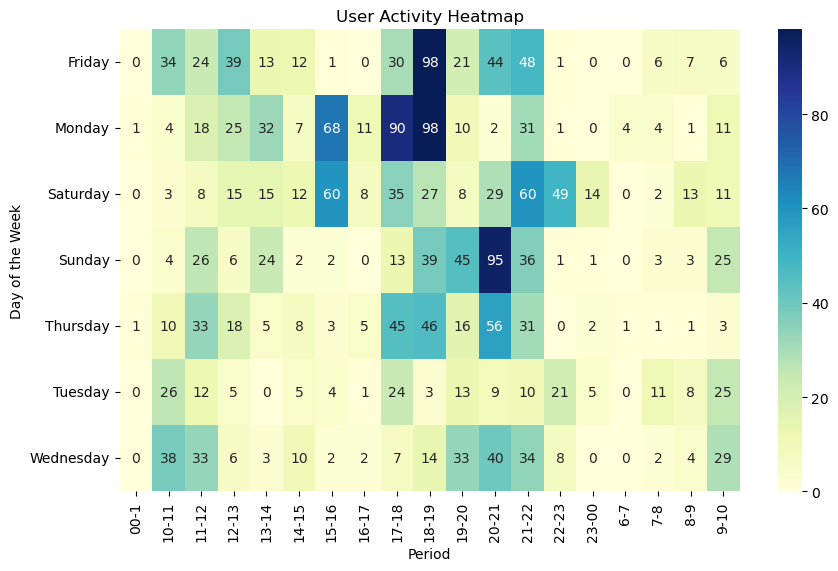

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(user_heatmap, cmap='YlGnBu', annot=True, fmt='g')
plt.title('User Activity Heatmap')
plt.xlabel('Period')
plt.ylabel('Day of the Week')
plt.show()


In [94]:
from textblob import TextBlob

# Function to categorize sentiment into positive, negative, or neutral
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to calculate sentiment score and categorize sentiment
def analyze_sentiment(message):
    blob = TextBlob(message)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = categorize_sentiment(sentiment_score)
    return sentiment_label, sentiment_score

# Function to perform sentiment analysis for a specific user
def sentiment_analysis_for_user(df, selected_user):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df_selected_user = df.copy()
    
    if selected_user != 'Overall':
        df_selected_user = df_selected_user[df_selected_user['user'] == selected_user]

    # Calculate sentiment score and categorize sentiment for each message
    df_selected_user[['sentiment_label', 'sentiment_score']] = df_selected_user['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

    # Count the occurrences of each sentiment category
    sentiment_counts = df_selected_user['sentiment_label'].value_counts()

    print(f"Sentiment Analysis Results for {selected_user}:")
    print(sentiment_counts)

    # Display sentiment score along with the number of messages for each sentiment category
    for sentiment, count in sentiment_counts.items():
        mean_score = df_selected_user[df_selected_user['sentiment_label'] == sentiment]['sentiment_score'].mean()
        print(f"{sentiment}: No. of Messages - {count}, Mean Score - {mean_score}")

# Perform sentiment analysis for a specific user
sentiment_analysis_for_user(df, selected_user)

Sentiment Analysis Results for Overall:
sentiment_label
Neutral     2058
Positive     102
Negative      68
Name: count, dtype: int64
Neutral: No. of Messages - 2058, Mean Score - 0.0
Positive: No. of Messages - 102, Mean Score - 0.4227544881588999
Negative: No. of Messages - 68, Mean Score - -0.34689250700280116


In [95]:
# pip install textblob

In [98]:
import pandas as pd
from textblob import TextBlob

# Function to categorize sentiment into positive, negative, or neutral
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to calculate sentiment score and categorize sentiment
def analyze_sentiment(message):
    blob = TextBlob(message)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = categorize_sentiment(sentiment_score)
    return sentiment_label, sentiment_score

# Function to perform sentiment analysis for a specific user
def sentiment_analysis_for_user(df, selected_user):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df_selected_user = df.copy()
    
    if selected_user != 'Overall':
        df_selected_user = df_selected_user[df_selected_user['user'] == selected_user]

    # Calculate sentiment score and categorize sentiment for each message
    df_selected_user[['sentiment_label', 'sentiment_score']] = df_selected_user['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

    # Display top 6 messages along with their sentiment scores
    print("Top 6 Messages:")
    top_messages = df_selected_user.nlargest(20, 'sentiment_score')[['message', 'sentiment_label', 'sentiment_score']]
    print(top_messages)

    # Count the occurrences of each sentiment category
    sentiment_counts = df_selected_user['sentiment_label'].value_counts()

    print(f"\nSentiment Analysis Results for {selected_user}:")
    print(sentiment_counts)

    # Display sentiment score along with the number of messages for each sentiment category
    for sentiment, count in sentiment_counts.items():
        mean_score = df_selected_user[df_selected_user['sentiment_label'] == sentiment]['sentiment_score'].mean()
        print(f"{sentiment}: No. of Messages - {count}, Mean Score - {mean_score}")

    # Calculate and display the average sentiment score for the top 6 messages
    avg_top_sentiment_score = top_messages['sentiment_score'].mean()
    print(f"\nAverage Sentiment Score for Top 6 Messages: {avg_top_sentiment_score}")

# Perform sentiment analysis for a specific user
selected_user = 'Overall'
sentiment_analysis_for_user(df, selected_user)


Top 6 Messages:
                                                 message sentiment_label  \
1741                                Greatest of all time        Positive   
1760                        Best trene till date anocchu        Positive   
2819                                             perfect        Positive   
8601                             Naa best match bro idhi        Positive   
11123  Ilanti vallaki seethamma vaakitlo sirimalle ch...        Positive   
11761                    All the best @919182312019 mowa        Positive   
13255                           Best idea.. mummy or sis        Positive   
508                     Happy b'day @917674999446 bro 🐍🎂        Positive   
1391                          Happy friendship day prnds        Positive   
3253                                               Happy        Positive   
3809          Vaadiki em ardham aitadhi ra welcome antaa        Positive   
10721                   Happy B'day @916300856657 Bro 🫂🎂        Positive